In [1]:
import pandas as pd
import numpy as np

%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [2]:
gez = pd.read_csv("gezondheid-2020.csv", sep=";", index_col="Codering_3")
kwb = pd.read_excel("kwb-2019.xls", index_col="gwb_code_10", decimal=",")


In [3]:
# Find the amount rows that does not exists in gez and kwb
miss_aligned_codes = set(gez.index) - set(kwb.index)
print(
    f"{len(miss_aligned_codes)} codes are missing from on or the other dataset. That equates to approximately {len(miss_aligned_codes) / len(gez.index) * 100:.3f}% of the codes."
)

# Drop the rows where the code is missing
kwb = kwb.drop(miss_aligned_codes, errors="ignore")
gez = gez.drop(miss_aligned_codes, errors="igore")

# The missing data is represented initially by a single dot. This will be replaced by np.nan, so that it can be correctly noted as missing and, handled appropiatley.
kwb = kwb.replace(".", np.nan)


524 codes are missing from on or the other dataset. That equates to approximately 3.022% of the codes.


## Load kwb-dataset


In [4]:
kwb.sample(5)


,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,a_00_14,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
gwb_code_10,,,,,,,,,,,,,,,,,,,,,
BU09350205,9350205,Caberg,Maastricht,Buurt,BU09350205,1,3285,1595,1685,510,...,0.4,0.4,10.2,61,61,0,6217,1,2,2102
WK195904,195904,Hank,Altena,Wijk,WK195904,3,4220,2160,2060,625,...,0.9,0.8,2.0,2460,2190,270,NaN,NaN,5,375
BU19001604,19001604,Exmorra,Súdwest-Fryslân,Buurt,BU19001604,1,400,205,195,80,...,0.3,0.3,1.0,28,27,1,8759,1,5,57
BU04020604,4020604,Liebergen,Hilversum,Buurt,BU04020604,1,5080,2505,2570,925,...,0.3,0.4,18.5,49,49,0,1223,1,1,2881
BU19661202,19661202,Kruisweg,Het Hogeland,Buurt,BU19661202,2,355,185,170,65,...,1.3,1.3,1.0,61,61,0,9977,1,5,118


## Load gezondheid-dataset


In [5]:
gez.sample(5)


,ID,Leeftijd,Marges,WijkenEnBuurten,Perioden,Gemeentenaam_1,WekelijkseSporters_6,Eenzaam_28
Codering_3,,,,,,,,
BU01660006,24872,20300,MW00000,BU01660006,2020JJ00,Kampen,44.5,42.3
BU07153400,41423,20300,MW00000,BU07153400,2020JJ00,Terneuzen,35.6,48.4
BU02220907,12218,20300,MW00000,BU02220907,2020JJ00,Doetinchem,60.4,36.1
BU19610208,45671,20300,MW00000,BU19610208,2020JJ00,Vijfheerenlanden,56.4,38.3
BU07580201,9014,20300,MW00000,BU07580201,2020JJ00,Breda,61.5,42.2


In [6]:
# Drop unnecessary columns
gez = gez.drop(
    ["ID", "Leeftijd", "Marges", "Perioden", "Gemeentenaam_1", "WijkenEnBuurten"],
    axis=1,
    errors="ignore",
)


In [7]:
gez.info()


<class 'pandas.core.frame.DataFrame'>
Index: 16817 entries, GM1680 to BU01935210
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   WekelijkseSporters_6  16817 non-null  object
 1   Eenzaam_28            16817 non-null  object
dtypes: object(2)
memory usage: 394.1+ KB


In [8]:
# Fix wrong dtype on the columns
wrong_dtype = ["WekelijkseSporters_6", "Eenzaam_28"]
gez[wrong_dtype] = gez[wrong_dtype].replace(" .", np.nan)
gez[wrong_dtype] = gez[wrong_dtype].astype(float)


In [9]:
round(gez.describe(), 2)


,WekelijkseSporters_6,Eenzaam_28
count,16127.00,16127.00
mean,48.52,44.08
std,7.70,6.38
min,14.70,22.30
25%,43.30,39.40
50%,48.10,42.70
75%,53.50,47.70
max,75.40,79.50


In [10]:
gez.isna().sum() / len(gez) * 100


WekelijkseSporters_6    4.102991
Eenzaam_28              4.102991
dtype: float64

# Combine the Data


In [11]:
combined = kwb.copy()
combined[["sporting", "loneliness"]] = gez[["WekelijkseSporters_6", "Eenzaam_28"]]


In [12]:
combined.head()


,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,a_00_14,...,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad,sporting,loneliness
gwb_code_10,,,,,,,,,,,,,,,,,,,,,
NL00,0,Nederland,Nederland,Land,NL00,NaN,17282163,8581086,8701077,2739819,...,10.9,4154338,3367109,787228,NaN,NaN,2,1994,NaN,NaN
GM0003,3,Appingedam,Appingedam,Gemeente,GM0003,NaN,11721,5720,6001,1718,...,6.4,2458,2378,80,NaN,NaN,3,1067,36.3,49.4
WK000300,300,Wijk 00,Appingedam,Wijk,WK000300,1,11720,5720,6000,1715,...,6.4,2458,2378,80,NaN,NaN,3,1067,36.3,49.4
BU00030000,30000,Appingedam-Centrum,Appingedam,Buurt,BU00030000,1,2370,1135,1230,230,...,7.1,90,84,5,9901,1,3,1210,35.4,51.6
BU00030001,30001,Appingedam-West,Appingedam,Buurt,BU00030001,1,3035,1505,1530,480,...,4.0,163,158,5,9903,6,4,903,41.5,41.5


In [13]:
# Drop the first row, as it contains data for the whole Netherlands.
combined = combined.drop("NL00", errors="ignore")

# List of columns in combined, that is not needed

columns_to_drop = [
    "gwb_code_8",
    "regio",
    "gm_naam",
    "recs",
    "gwb_code",
    "ind_wbi",
    "pst_mvp",
    "pst_dekp",
]

combined = combined.drop(columns_to_drop, axis=1, errors="ignore")


In [14]:
combined.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17113 entries, GM0003 to BU19782004
Columns: 102 entries, a_inw to loneliness
dtypes: float64(18), int64(36), object(48)
memory usage: 13.4+ MB


In [15]:
combined = combined.apply(pd.to_numeric)
combined.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17113 entries, GM0003 to BU19782004
Columns: 102 entries, a_inw to loneliness
dtypes: float64(66), int64(36)
memory usage: 13.4+ MB


# Missing Data


In [16]:
# Percent of missing data
print(
    round(
        combined.isna().sum().replace(0, np.nan).dropna() / len(combined) * 100, 3
    ).sort_values(ascending=False)
)

# Since we have data that are missing in the "predict" columns, we will drop those rows.
# Reason for having missing data there is most probably because of a missmatch in the gemeente codes from 2019 (kwb-dataset) and 2020 (gezondheid-dataset), and for the fact that some data was retracted for privacy reasons. This data was either way based on a small region, so it might even be good that it is removed.

combined = combined.dropna(subset=["sporting", "loneliness"])


g_ink_pi    100.000
p_hh_hi     100.000
a_inkont    100.000
g_ink_po    100.000
p_ink_hi    100.000
             ...   
g_3km_sc      3.939
bev_dich      3.892
g_hhgro       2.115
ste_oad       0.397
ste_mvs       0.386
Length: 66, dtype: float64


In [17]:
# Get all the columns with the proportion of missing values
combined_missing_proportion = (
    combined.isna().sum().replace(0, np.nan).dropna() / len(combined) * 100
)

# Drop the columns that have more than 25 percent missing values
columns_to_drop = combined_missing_proportion[combined_missing_proportion > 25].index
combined = combined.drop(columns=columns_to_drop)
print(f"Dropping {len(columns_to_drop)} columns. The following columns were dropped: {list(columns_to_drop)}")

# Percent of missing data
print(round(combined.isna().sum().replace(0, np.nan).dropna() / len(combined) * 100, 3))


Dropping 22 columns. The following columns were dropped: ['g_ele_ap', 'g_ele_tw', 'g_ele_hw', 'g_ele_2w', 'g_gas_ap', 'g_gas_tw', 'g_gas_hw', 'g_gas_2w', 'p_stadsv', 'a_inkont', 'g_ink_po', 'g_ink_pi', 'p_ink_li', 'p_ink_hi', 'p_n_act', 'p_hh_li', 'p_hh_hi', 'p_hh_lkk', 'p_hh_osm', 'g_wodief', 'g_vernoo', 'g_gewsek']
g_hhgro      0.062
bev_dich     0.161
g_woz       17.077
p_1gezw      5.134
p_mgezw      5.134
p_bewndw     5.134
p_leegsw     5.134
p_koopw      5.159
p_huurw      5.159
p_wcorpw     5.159
p_ov_hw      5.159
p_e_o_w      5.159
p_bjj2k      5.134
p_bjo2k      5.134
g_ele        2.728
g_ele_vw    18.044
g_ele_hu    18.801
g_ele_ko     4.136
g_gas        4.508
g_gas_vw    18.974
g_gas_hu    20.500
g_gas_ko     5.779
a_soz_wb     4.905
a_soz_ao     4.905
a_soz_ww     4.905
a_soz_ow     4.905
a_bed_a     12.836
a_bed_bf    12.836
a_bed_gi    12.836
a_bed_hj    12.836
a_bed_kl    12.836
a_bed_mn    12.836
a_bed_ru    12.836
g_pau_hh    14.473
g_pau_km    14.473
g_afs_hp     0.2

In [18]:
missing_data_sum = []
steps = [i for i in range(1, 40)]

for i in steps:
    missing_data_sum.append(
        combined.dropna(thresh=combined.shape[1] - i)
        .isna()
        .sum()
        .replace(0, np.nan)
        .dropna()
        .sum()
    )


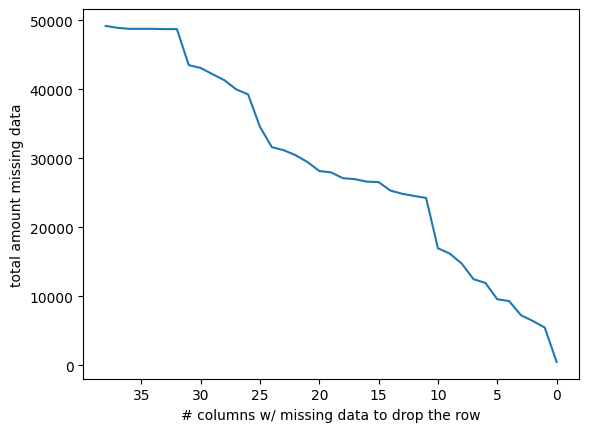

In [19]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.plot(missing_data_sum)
plt.xlabel("# columns w/ missing data to drop the row")
plt.ylabel("total amount missing data")
plt.gca().invert_xaxis()
plt.savefig("missing_row_plot.png")


In [20]:
100 - len(combined.dropna(thresh=combined.shape[1]-12)) / len(combined) * 100

6.157375829354493

In [21]:
# We need to fix the missing data that is left, let us see how much data that are missing after removing with 10

combined = combined.dropna(thresh=combined.shape[1] - 10)
combined.isna().sum().replace(0, np.nan).dropna() / len(combined) * 100 

g_woz        7.886544
p_koopw      0.013836
p_huurw      0.013836
p_wcorpw     0.013836
p_ov_hw      0.013836
p_e_o_w      0.013836
g_ele        0.200623
g_ele_vw    15.849187
g_ele_hu    10.051885
g_ele_ko     0.705638
g_gas        1.660325
g_gas_vw    16.527153
g_gas_hu    11.781391
g_gas_ko     2.165341
a_soz_wb     0.124524
a_soz_ao     0.124524
a_soz_ww     0.124524
a_soz_ow     0.124524
a_bed_a      4.863369
a_bed_bf     4.863369
a_bed_gi     4.863369
a_bed_hj     4.863369
a_bed_kl     4.863369
a_bed_mn     4.863369
a_bed_ru     4.863369
g_pau_hh     5.147008
g_pau_km     5.147008
g_afs_hp     0.027672
g_afs_gs     0.027672
g_afs_kv     0.027672
g_afs_sc     0.027672
g_3km_sc     0.027672
dtype: float64

In [22]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

comb_test = combined.sample(int(len(combined) * 0.3), random_state=110)
# comb_test = comb_test.dropna()

pipe = Pipeline(
    [
        ("imputer", IterativeImputer(max_iter=10, tol=1e-3, random_state=100)),
        ("scaler", StandardScaler()),
        ("model", RandomForestRegressor(random_state=100)),
    ]
)

imputer_estimators = {
    "imputer__estimator": [
        RandomForestRegressor(random_state=100),
        DecisionTreeRegressor(random_state=100),
        Ridge(),
        Lasso(),
        KNeighborsRegressor(),
    ]
}

gsc = GridSearchCV(estimator=pipe, param_grid=imputer_estimators, n_jobs=3, verbose=1)
# Will take about 6 hours to complete. The result is published on github, to review, but it found out that dections tree is the best way.
# gsc.fit(comb_test.drop(columns=["loneliness"]), comb_test["loneliness"])
# pd.DataFrame(gsc.cv_results_).to_csv("grid_search_results_iterative.csv")


In [23]:
pd.read_csv("grid_search_results_iterative.csv")

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_imputer__estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,11157.155595,158.364560,2.704563,1.277212,RandomForestRegressor(random_state=100),{'imputer__estimator': RandomForestRegressor(r...,0.879058,0.879075,0.870767,0.871638,0.880596,0.876227,0.004149,3
1,1,126.114623,0.846200,0.062035,0.002130,DecisionTreeRegressor(random_state=100),{'imputer__estimator': DecisionTreeRegressor(r...,0.879451,0.876207,0.877405,0.871733,0.879907,0.876941,0.002932,1
2,2,18.787685,0.187143,0.053382,0.003470,Ridge(),{'imputer__estimator': Ridge()},0.881833,0.879874,0.868930,0.868394,0.879219,0.875650,0.005773,4
3,3,114.374965,5.074854,0.056572,0.005685,Lasso(),{'imputer__estimator': Lasso()},0.880496,0.880773,0.872087,0.869616,0.879141,0.876422,0.004648,2
4,4,20.378629,0.153673,0.335132,0.025943,KNeighborsRegressor(),{'imputer__estimator': KNeighborsRegressor()},0.878600,0.877632,0.871093,0.872108,0.878488,0.875584,0.003286,5


In [24]:
# Find best parameters for decision tree, using the same dataset
comb_test = combined.sample(int(len(combined) * 0.3), random_state=110)

pipe = Pipeline(
    [
        ("imputer", IterativeImputer(max_iter=10, tol=1e-3, random_state=100)),
        ("scaler", StandardScaler()),
        ("model", RandomForestRegressor(random_state=100)),
    ]
)

param = {
    "imputer__estimator": [
        KNeighborsRegressor(),
        KNeighborsRegressor(n_neighbors=10),
        KNeighborsRegressor(n_neighbors=15),
        KNeighborsRegressor(n_neighbors=20),
        KNeighborsRegressor(n_neighbors=25),
        KNeighborsRegressor(n_neighbors=30),
        KNeighborsRegressor(n_neighbors=35),
    ]
}

gsc = GridSearchCV(pipe, param, verbose=2, n_jobs=3)
gsc.fit(comb_test.drop(columns=["loneliness"]), comb_test["loneliness"])
pd.DataFrame(gsc.cv_results_).to_csv("grid_search_results_knn.csv")


Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [25]:
pd.read_csv("grid_search_results_knn.csv")

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_imputer__estimator,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0,21.960544,1.160182,0.392520,0.162956,KNeighborsRegressor(),{'imputer__estimator': KNeighborsRegressor()},0.888733,0.877443,0.873471,0.875294,0.877842,0.878557,0.005326,5
1,1,19.766812,0.911372,0.206848,0.103322,KNeighborsRegressor(n_neighbors=10),{'imputer__estimator': KNeighborsRegressor(n_n...,0.889801,0.879016,0.873656,0.874679,0.877958,0.879022,0.005744,2
2,2,18.434172,0.676268,0.170083,0.086680,KNeighborsRegressor(n_neighbors=15),{'imputer__estimator': KNeighborsRegressor(n_n...,0.889772,0.878250,0.873887,0.875379,0.877651,0.878988,0.005616,3
3,3,18.451347,0.555515,0.159374,0.058121,KNeighborsRegressor(n_neighbors=20),{'imputer__estimator': KNeighborsRegressor(n_n...,0.887859,0.876205,0.874482,0.875689,0.878923,0.878632,0.004837,4
4,4,18.174847,0.228304,0.138630,0.027818,KNeighborsRegressor(n_neighbors=25),{'imputer__estimator': KNeighborsRegressor(n_n...,0.888219,0.875875,0.873607,0.875216,0.878453,0.878274,0.005212,7
5,5,19.037318,0.737291,0.166356,0.093229,KNeighborsRegressor(n_neighbors=30),{'imputer__estimator': KNeighborsRegressor(n_n...,0.888650,0.876742,0.873996,0.875283,0.877692,0.878473,0.005242,6
6,6,18.327733,0.863775,0.171075,0.089945,KNeighborsRegressor(n_neighbors=35),{'imputer__estimator': KNeighborsRegressor(n_n...,0.889129,0.877461,0.875377,0.875011,0.878335,0.879062,0.005185,1


In [29]:
iter_imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=10), max_iter=20, tol=1e-3, random_state=100)
imputed = iter_imputer.fit_transform(combined)
combined_imputed = pd.DataFrame(imputed, columns=combined.columns)

In [31]:
# No missing data is left
combined_imputed.isna().sum().sum()

0

In [32]:
combined_imputed.to_csv("pre-processed-data.csv")


<AxesSubplot: >

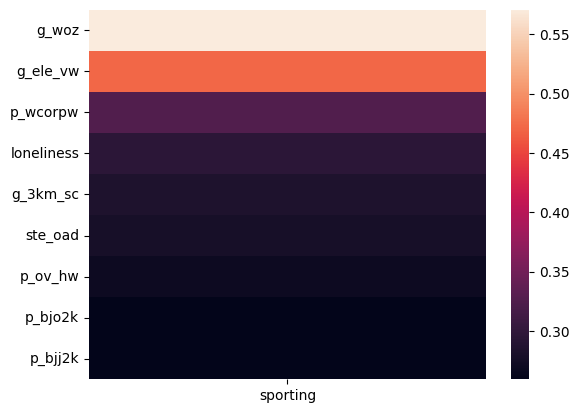

In [27]:
#  Correlation

import seaborn as sb

corr = abs(combined.corr())

sb.heatmap(corr[["sporting"]].sort_values(by="sporting", ascending=False)[1:10])


<AxesSubplot: >

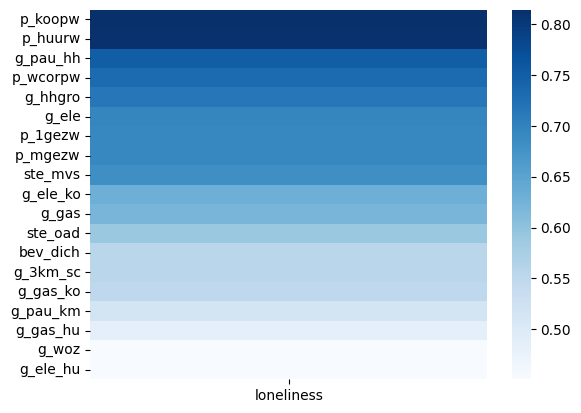

In [28]:
sb.heatmap(corr[["loneliness"]].sort_values(by="loneliness", ascending=False)[1:20],cmap="Blues")
